Modelo regresion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Carga de datos
df = pd.read_csv("AccidentesElectricos_Limpio (1).csv")

# Eliminamos filas con valores nulos en las columnas relevantes
df = df.dropna(subset=[
    'TIEMPO_VINCULACION', 
    'TIPO_LESION', 
    'ORIGEN_ACCIDENTE', 
    'CAUSA_ACCIDENTE'
])

In [4]:
X = df[['TIPO_LESION', 'ORIGEN_ACCIDENTE', 'CAUSA_ACCIDENTE']]
y = df['TIEMPO_VINCULACION'].astype(float)

In [5]:
# División entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Codificación con One-Hot Encoding
categorical_features = ['TIPO_LESION', 'ORIGEN_ACCIDENTE', 'CAUSA_ACCIDENTE']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [6]:
# Modelo de regresión lineal
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenamiento del modelo
regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['TIPO_LESION',
                                                   'ORIGEN_ACCIDENTE',
                                                   'CAUSA_ACCIDENTE'])])),
                ('regressor', LinearRegression())])

In [7]:
# Predicciones
y_pred = regression_pipeline.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

RMSE: 139.39
R² Score: -0.051


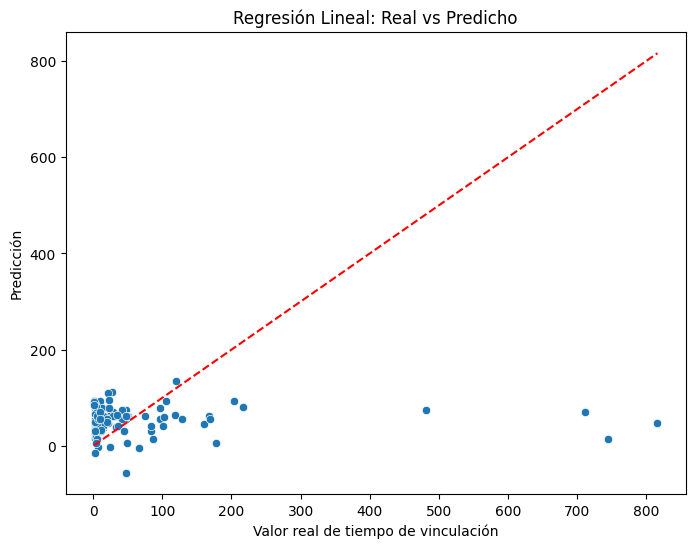

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valor real de tiempo de vinculación")
plt.ylabel("Predicción")
plt.title("Regresión Lineal: Real vs Predicho")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Seleccionamos automáticamente solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Mostrar nombres de columnas numéricas
print("Columnas numéricas disponibles:", df_numeric.columns.tolist())

Columnas numéricas disponibles: ['IDENTIFICADOR_EMPRESA', 'ANIO', 'TRIMESTRE', 'COD_DANE', 'EDAD', 'TIEMPO_VINCULACION']


In [11]:
# Matriz de correlación de Pearson
correlation_matrix = df_numeric.corr()

# Mostrar la matriz en texto
print(correlation_matrix)

                       IDENTIFICADOR_EMPRESA      ANIO  TRIMESTRE  COD_DANE  \
IDENTIFICADOR_EMPRESA               1.000000  0.111320   0.058703 -0.127058   
ANIO                                0.111320  1.000000  -0.167751 -0.102821   
TRIMESTRE                           0.058703 -0.167751   1.000000 -0.029066   
COD_DANE                           -0.127058 -0.102821  -0.029066  1.000000   
EDAD                               -0.034927  0.136041  -0.045497 -0.092444   
TIEMPO_VINCULACION                 -0.150760  0.048824  -0.041812 -0.022541   

                           EDAD  TIEMPO_VINCULACION  
IDENTIFICADOR_EMPRESA -0.034927           -0.150760  
ANIO                   0.136041            0.048824  
TRIMESTRE             -0.045497           -0.041812  
COD_DANE              -0.092444           -0.022541  
EDAD                   1.000000            0.392327  
TIEMPO_VINCULACION     0.392327            1.000000  


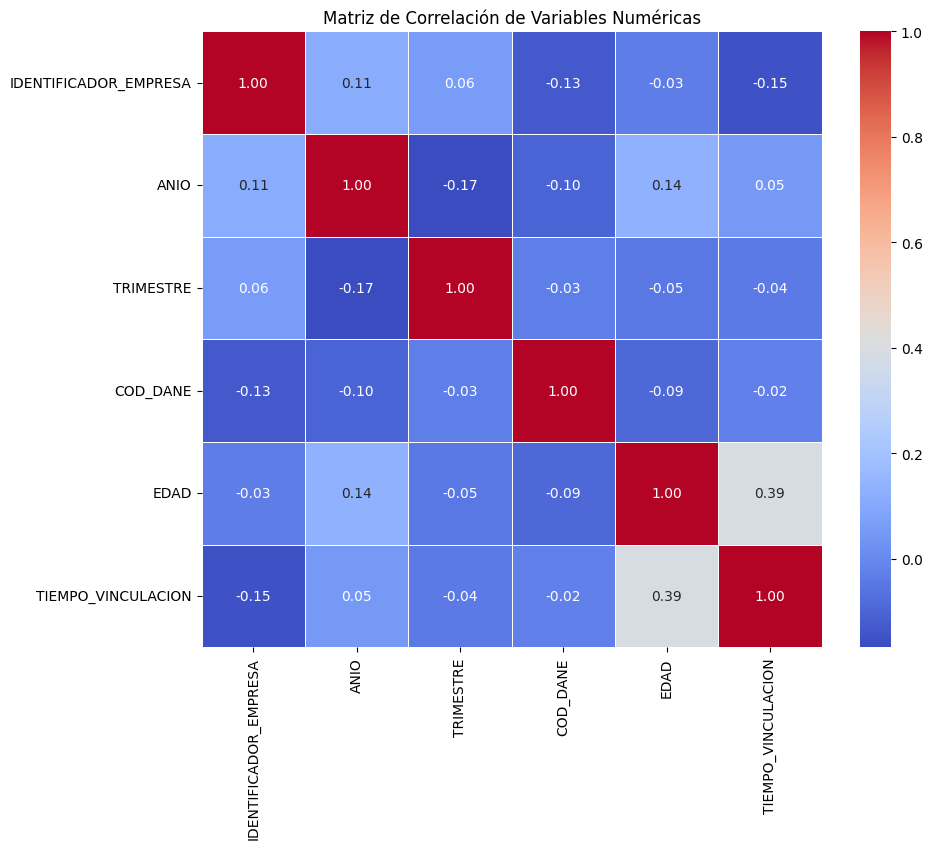

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()